<a href="https://colab.research.google.com/github/igor-stefan/instrumentacao_EE2022/blob/main/calibracao_instrumentacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise da Medida 1:

erro_max = 0.0604
uexp = 0.011527994751907203
inc_min = (erro_max - uexp) = 0.0488720052480928
inc_max = (erro_max + uexp) = 0.0719279947519072
erro = 0.08199999999999996
RESULTADO: REPROVADO
--------------------------------------

Análise da Medida 2:

erro_max = 0.1078
uexp = 0.07626386152693816
inc_min = (erro_max - uexp) = 0.031536138473061845
inc_max = (erro_max + uexp) = 0.18406386152693816
erro = 0.10000000000000009
RESULTADO: ZONA DE DUVIDA
--------------------------------------

Análise da Medida 3:

erro_max = 0.1638
uexp = 0.10232789539026003
inc_min = (erro_max - uexp) = 0.061472104609739966
inc_max = (erro_max + uexp) = 0.26612789539026005
erro = 0.040000000000000036
RESULTADO: APROVADO
--------------------------------------

Equipamento NÃO FOI totalmente aprovado.



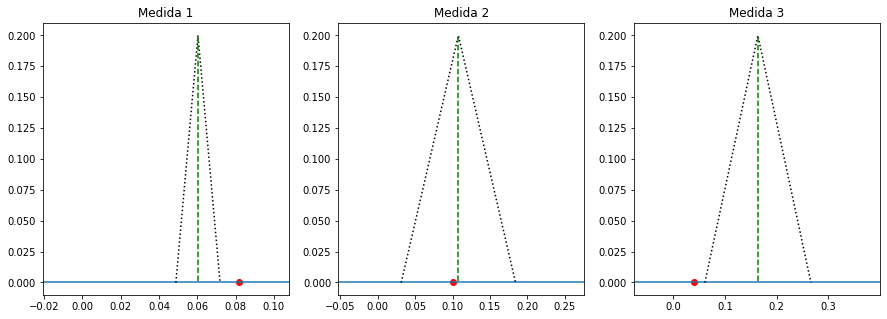

In [ ]:
from math import sqrt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#medidas
ep = [.602, 2.99, 5.73]         # equipamento padrao
res_ep = [.001, .01, .01]       # resolucao na respectiva medida realizada

ec = [.52, 2.89, 5.69]         # equipamento a ser calibrado
res_ec = [.01, .01, .01]       # resolucao na respectiva medida realizada

aprovado = 0
for medida in range(len(ep)):
    print("Análise da Medida " + str(medida + 1) + ":\n")
    
    deltaC = res_ec[medida]             # resolucao do equipamento a ser calibrado
    u_deltaC = deltaC / (2 * sqrt(3))   # u(deltaC) da formula de incerteza da calibracao é metade da resolucao dividido por sqrt(3)

    deltaP = (1. / 100.) * ep[medida] + 5 * res_ep[medida]  # incerteza da medicao (precisao do ep)
    u_deltaP = deltaP / sqrt(3)                             # incerteza equipamento padrao é tipo B (retangular)

    uc = sqrt(u_deltaP ** 2 + u_deltaC ** 2)  # incerteza combinada
    uexp = uc * 1.65                          # incerteza expandida!

    erro_max = (2. / 100.) * ec[medida] + 5 * res_ec[medida]   # precisao do equipamento a ser calibrado
    erro = abs(ep[medida] - ec[medida])                        # erro entre o valor medido pelo EC (ec) e pelo EP (chinês)
    duvida_min = erro_max - uexp                               # limite inferior da zona de duvida
    duvida_max = erro_max + uexp                               # limite superior da zona de duvida
    
    print('erro_max =', erro_max)
    print('uexp =', uexp)
    print('inc_min = (erro_max - uexp) =', duvida_min)
    print('inc_max = (erro_max + uexp) =', duvida_max)
    print('erro =', erro)
    print('RESULTADO: ', end='',sep='')
    
    if erro < duvida_min:
        print("APROVADO")
        aprovado += 1
    elif erro >= duvida_min and erro <= duvida_max:
          print("ZONA DE DUVIDA")
    else:
      print("REPROVADO")
    print("--------------------------------------\n")
    ax[medida].scatter(erro, 0, color = 'r')
    ax[medida].axhline(0)
    ax[medida].plot([duvida_min, erro_max, duvida_max], [0, .2, 0], c='k', ls='dotted')
    ax[medida].set_xlim([-duvida_max / 3.5, max(duvida_max * 1.5, erro * 1.1)])
    ax[medida].axvline(erro_max, .05, .95, ls = '--', c='g')
    ax[medida].set_title("Medida " + str(medida + 1))

if aprovado == 3:
    print('\033[1m','Equipamento totalmente aprovado.\n','\033[0m', sep='')
else:
    print('\033[1m','Equipamento NÃO FOI totalmente aprovado.\n','\033[0m', sep='')
